# Nonlinear Dimensionality Reduction

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("/Users/benchen/NeuralHub/Neuromatch/NM_DL_custom_plot_style.mplstyle")

In [3]:
# @title Plotting Functions

def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  plt.scatter(x=component1, y=component2, c=labels, cmap='tab10')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

## Applications of PCA
1. Finding the latent variable subspace
2. De-noise the dataset, by projecting the dataset onto key principle component bases
3. Pre-processing before employing other nonlinear dimensionality reduction methods

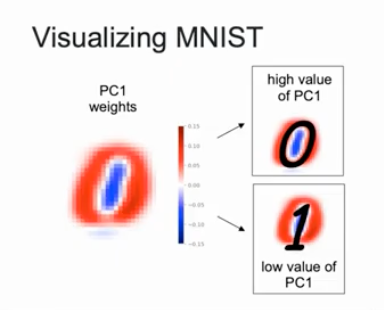

The input that resemble the eigenvector weights in the PC1, will return a high value when testing, thus classifying it as that of PC1

In [17]:
from scipy.io import arff

# Load ARFF file
data, meta = arff.loadarff("mnist_784.arff")

# Convert structured array -> NumPy
X_all = np.array([[row[i] for i in range(len(meta.names()) - 1)] for row in data], dtype=np.float32)
labels_all = np.array([int(row[-1].decode("utf-8")) for row in data])  # decode byte strings

In [18]:
from sklearn.decomposition import PCA

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(X_all)

PCA(n_components=2)

In [19]:
help(visualize_components)
help(pca_model.transform)

Help on function visualize_components in module __main__:

visualize_components(component1, component2, labels, show=True)
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.
    
    Args:
      component1 (numpy array of floats) : Vector of component 1 scores
      component2 (numpy array of floats) : Vector of component 2 scores
      labels (numpy array of floats)     : Vector corresponding to categories of
                                           samples
    
    Returns:
      Nothing.

Help on method transform in module sklearn.decomposition._base:

transform(X) method of sklearn.decomposition._pca.PCA instance
    Apply dimensionality reduction to X.
    
    X is projected on the first principal components previously extracted
    from a training set.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        New data, where `n_samples` is the number of samples
        and `n_featur

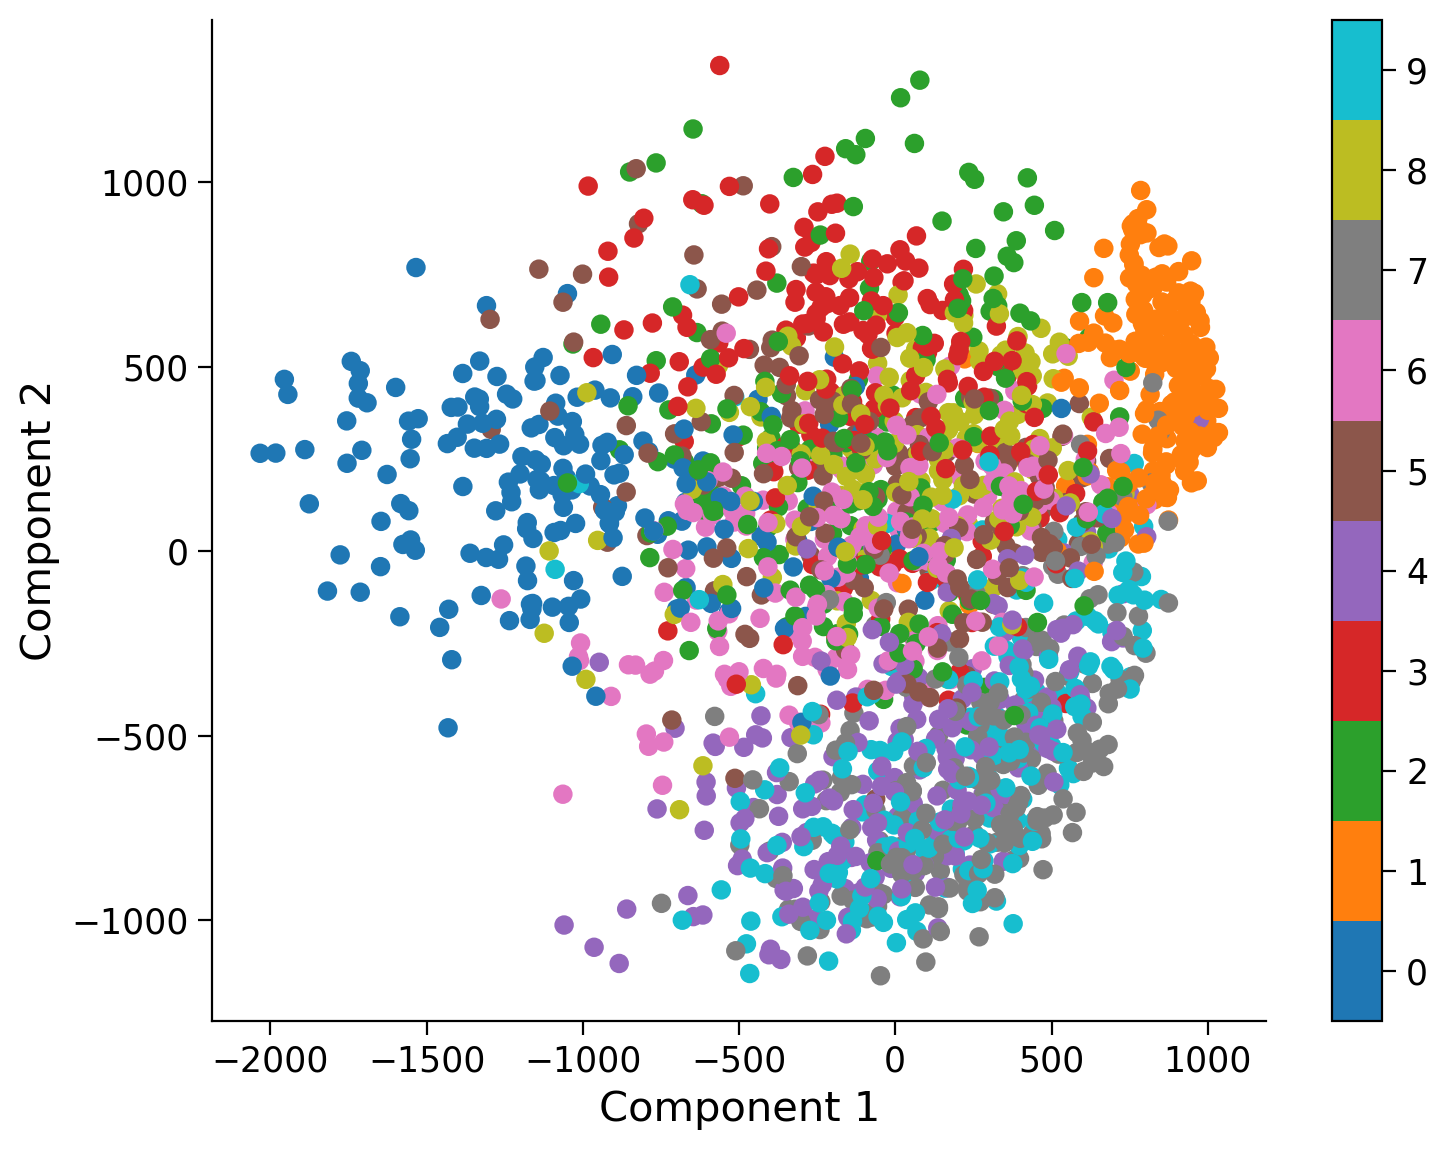

In [23]:
# Take only the first 2000 samples with the corresponding labels
X, labels = X_all[:2000,:], labels_all[:2000]

# Perform PCA
scores = pca_model.transform(X)

#Directional modification to align with the tutorial
scores[:, 0] *= -1
scores[:, 1] *= -1


# Plot the data and reconstruction
visualize_components(scores[:, 0], scores[:, 1], labels)

In [14]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)

In [15]:
help(tsne_model.fit_transform)

Help on method fit_transform in module sklearn.manifold._t_sne:

fit_transform(X, y=None) method of sklearn.manifold._t_sne.TSNE instance
    Fit X into an embedded space and return that transformed output.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) or             (n_samples, n_samples)
        If the metric is 'precomputed' X must be a square distance
        matrix. Otherwise it contains a sample per row. If the method
        is 'exact', X may be a sparse matrix of type 'csr', 'csc'
        or 'coo'. If the method is 'barnes_hut' and the metric is
        'precomputed', X may be a precomputed sparse graph.
    
    y : None
        Ignored.
    
    Returns
    -------
    X_new : ndarray of shape (n_samples, n_components)
        Embedding of the training data in low-dimensional space.



In [ ]:


# Perform t-SNE
embed = ...

# Visualize the data
visualize_components(..., ..., labels)